In [0]:
from nltk.tokenize import word_tokenize
import spacy
import pandas as pd
from nltk.stem import WordNetLemmatizer 
from itertools import islice
import nltk
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import os
from os import path
from itertools import combinations
from google.colab.patches import cv2_imshow
from nltk.util import ngrams
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import cv2

from IPython.display import Image as img_show


In [6]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install wordcloud

In [0]:
url = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz' ##This is the file's url that we are reading.

In [0]:
df = pd.read_json(url, lines = True) ##Reading the file into a dataframe.

In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013"


In [0]:
df_short = df[0:100]

In [0]:
###TASK 1 Word Cloud. - Classwork

In [0]:
def create_word_cloud(string, file_name):
  #  maskArray = npy.array(Image.open("cloud.png"))
   cloud = WordCloud(width = 800, height = 800, background_color = "white", max_words = 200, stopwords = set(STOPWORDS))
   cloud.generate(string)

   save_path = "/content/wordClouds/"
   
   if (path.exists(save_path)):
      cloud.to_file(save_path + file_name + '.png')
   else:
      try:
        os.mkdir(save_path)
      except OSError:
        print ("Creation of the directory %s failed" % path)
      else:
        print ("Successfully created the directory %s " % path)
        cloud.to_file(save_path + file_name + '.png')

In [0]:
##AFTER RUNNING THE BELOW CELL, A FOLDER NAMED wordClouds will be created and all the word cloud images will be stored there.

In [12]:
for index, row in df_short.iterrows():
     # access data using column names
     create_word_cloud(string = str(row['reviewText']), file_name= str(index))

Successfully created the directory <module 'posixpath' from '/usr/lib/python3.6/posixpath.py'> 


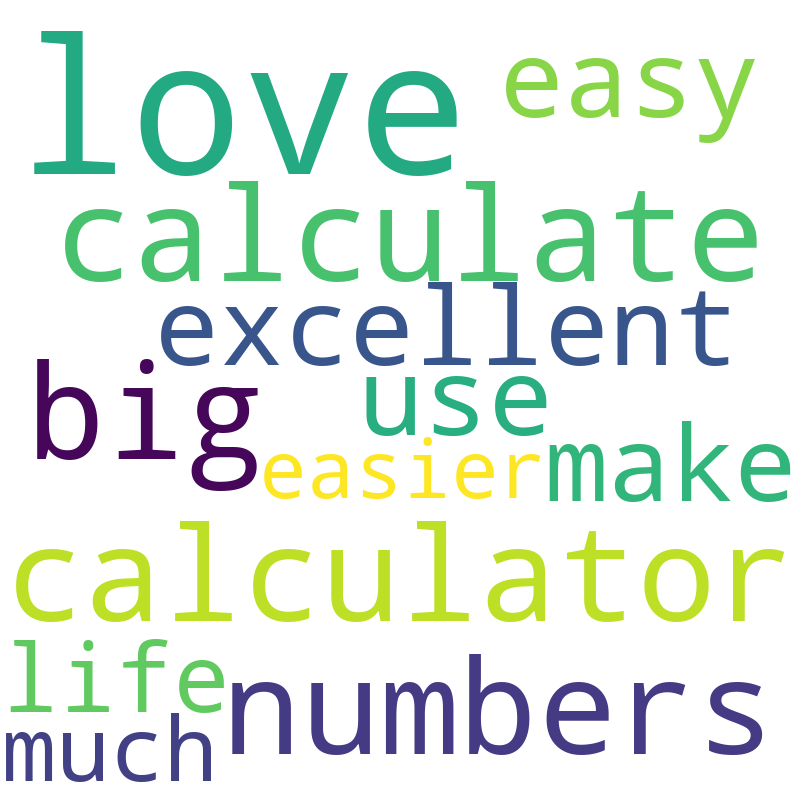

In [15]:
img_show('/content/wordClouds/9.png')

In [0]:
##TASK 2, SIMILARITY BETWEEN 2 STRINGS. -Classwork

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
def get_unique_words(input_string):
  word_filtered = []
  input_string = input_string.translate(str.maketrans('', '', string.punctuation))
  words = input_string.split()
  for word in words:
    if word not in stop_words:
        word_filtered.append(word)
  unique_words_list = list(dict.fromkeys(word_filtered))
  return unique_words_list

In [19]:
df_short['unique_words'] = df_short['reviewText'].apply(get_unique_words)
df_short.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,unique_words
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004","[I, bought, first, HP12C, 1984, served, faithf..."
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007","[WHY, THIS, BELATED, REVIEW, I, feel, obliged,..."
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011","[I, HP, 48GX, kicking, twenty, years, 11, 25, ..."
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006","[Ive, started, finance, stuff, recently, went,..."
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013","[For, simple, calculations, discounted, cash, ..."


In [20]:
bag_of_words = []
for i in range(df_short.shape[0]):
  bag_of_words += df_short['unique_words'][i]
len(bag_of_words)

5707

In [21]:
bag_unique = list(dict.fromkeys(bag_of_words))
bag_unique = [x.lower() for x in bag_unique]
len(bag_unique)

2466

In [22]:
comb = list(combinations(bag_unique, 2))
len(comb)

3039345

In [23]:
corpus = list(ngrams(bag_unique, 5))
corpus[0]

('i', 'bought', 'first', 'hp12c', '1984')

In [0]:
model = Word2Vec(corpus, size=100, window=5, min_count=1, workers=4)

In [25]:
similarity = []
for i in range(len(comb)):
  similarity.append(model.similarity(comb[i][0], comb[i][1]))
len(similarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


3039345

In [26]:
result = pd.DataFrame(list(zip(comb, similarity)), columns=['Combinations', 'Similarity_score'])
result.head()

,Combinations,Similarity_score
0,"(i, bought)",-0.027605
1,"(i, first)",-0.023110
2,"(i, hp12c)",-0.062007
3,"(i, 1984)",-0.046286
4,"(i, served)",-0.022682
